Скачачиваем библиотеки

In [1]:
!pip install dash pandas
!pip install seaborn
!pip install pandas
!pip install scipy
!pip install psycopg2-binary
!pip install config
!pip install PyMySQL
!pip install sqlalchemy
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy

  Using cached dash-2.16.1-py3-none-any.whl.metadata (10 kB)
  Using cached pandas-2.2.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached flask-3.0.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached werkzeug-3.0.1-py3-none-any.whl.metadata (4.1 kB)
  Using cached plotly-5.20.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached importlib_metadata-7.0.2-py3-none-any.whl.metadata (4.6 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached retrying-1.3.4-py3-none-any.whl.metadata (6.9 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached blinker-1.7.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
  Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl.

импортируем библиотеки

In [19]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib
from scipy import stats
from scipy.stats import norm, skew
from sqlalchemy import create_engine
import psycopg2
import dash
import dash_core_components as dcc
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import dash_html_components as html
import plotly.graph_objs as go 
import plotly.express as px

загружаем данные

In [9]:
conn = psycopg2.connect(
    dbname="Csv",
    user="postgres",
    password="12345",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()
cursor.execute("SELECT * FROM csv.expenses")
results = cursor.fetchall()

df_ex = pd.DataFrame(results)

cursor = conn.cursor()
cursor.execute("SELECT * FROM csv.order")
results = cursor.fetchall()

df_or = pd.DataFrame(results)

cursor = conn.cursor()
cursor.execute("SELECT * FROM csv.visitation")
results = cursor.fetchall()

df_vi = pd.DataFrame(results)

cursor = conn.cursor()
cursor.execute("SELECT * FROM public.merged_data")
results = cursor.fetchall()

merged_data = pd.DataFrame(results)
conn.close()

In [10]:
merged_data

,0,1,2,3,4,5,6,7
0,10006613101,2022-06-30 10:54:08,Android,Russia,4.99,FaceBoom,2022-06-30 10:54:29,180.253333
1,100256006722,2022-09-27 03:51:19,iPhone,Russia,4.99,TipTop,2022-09-27 03:51:19,267.687821
2,100293023530,2022-07-13 08:46:50,Mac,Russia,4.99,TipTop,2022-07-14 11:13:04,267.687821
3,100311327873,2022-08-18 03:42:23,PC,Thailand,5.99,WahooNetBanner,2022-08-19 07:26:38,28.616667
4,100352169572,2022-08-04 04:37:43,iPhone,Russia,9.99,TipTop,2022-08-05 05:19:35,267.687821
...,...,...,...,...,...,...,...,...
8859,999645428220,2022-10-01 05:35:55,Mac,Russia,5.99,TipTop,2022-10-01 05:36:23,267.687821
8860,999659859721,2022-09-04 10:33:02,Mac,Thailand,4.99,organic,2022-09-08 01:28:08,NaN
8861,99970989271,2022-09-21 07:32:47,Mac,Russia,4.99,FaceBoom,2022-09-21 07:33:27,180.253333
8862,999779032958,2022-07-04 10:56:11,iPhone,Russia,5.99,TipTop,2022-07-05 23:28:13,267.687821


In [11]:
df_ex.columns = ['dt', 'Channel', 'costs']
df_or.columns = ['User_Id' , 'Event_Dt','Revenue']
df_vi.columns = ['User_Id' , 'Region','Device','Channel','Session_Start','Session_End']
merged_data.columns = ['User_Id','Session_Start','Device','Region','Revenue','Channel','Event_Dt','mean_cost']

# 2.1 Построение дашборда - 2.2

Создадим дашборд через pandas dash ведь он очень удобный и имеет много функций

In [14]:
df = merged_data

In [16]:
df['time'] = df['Event_Dt'] - df['Session_Start']
df

,User_Id,Session_Start,Device,Region,Revenue,Channel,Event_Dt,mean_cost,time
0,10006613101,2022-06-30 10:54:08,Android,Russia,4.99,FaceBoom,2022-06-30 10:54:29,180.253333,0 days 00:00:21
1,100256006722,2022-09-27 03:51:19,iPhone,Russia,4.99,TipTop,2022-09-27 03:51:19,267.687821,0 days 00:00:00
2,100293023530,2022-07-13 08:46:50,Mac,Russia,4.99,TipTop,2022-07-14 11:13:04,267.687821,1 days 02:26:14
3,100311327873,2022-08-18 03:42:23,PC,Thailand,5.99,WahooNetBanner,2022-08-19 07:26:38,28.616667,1 days 03:44:15
4,100352169572,2022-08-04 04:37:43,iPhone,Russia,9.99,TipTop,2022-08-05 05:19:35,267.687821,1 days 00:41:52
...,...,...,...,...,...,...,...,...,...
8859,999645428220,2022-10-01 05:35:55,Mac,Russia,5.99,TipTop,2022-10-01 05:36:23,267.687821,0 days 00:00:28
8860,999659859721,2022-09-04 10:33:02,Mac,Thailand,4.99,organic,2022-09-08 01:28:08,NaN,3 days 14:55:06
8861,99970989271,2022-09-21 07:32:47,Mac,Russia,4.99,FaceBoom,2022-09-21 07:33:27,180.253333,0 days 00:00:40
8862,999779032958,2022-07-04 10:56:11,iPhone,Russia,5.99,TipTop,2022-07-05 23:28:13,267.687821,1 days 12:32:02


выбрали  самые  важные  показатели  , чтобы  отобразить их  на  дашборде  , добавил  множенственный  выбор для 'DAU', 'WAU', 'MAU' можно  сделать дял  каждой  колонки (долго)

In [17]:
dau = df['User_Id'].nunique()/180 #количество уникальных пользователей за день
wau = df['User_Id'].nunique()/26  #среднее количество уникальных пользователей за неделю
mau = df.groupby(df['Event_Dt'].dt.month)['User_Id'].nunique().mean()  
dic={'dau':dau, 'mau':mau ,'wau':wau }
region_mean_time_to_purchase = df.groupby('Region')['time'].mean()

In [20]:
all_graph =  dcc.Graph(id='dau-wau-mau-graph', figure={ 
        'data': [go.Bar(x=['DAU', 'WAU', 'MAU' ],
                        y=[dau, wau, mau ], marker=dict(color='turquoise'))], 
        'layout': {'title': 'DAU, WAU, MAU', 'plot_bgcolor': '#f8f8fa', 'paper_bgcolor': '#f8f8fa'} 
    }),

In [21]:
app = dash.Dash(__name__) 
 
#создание макета дашборда 
app.layout = html.Div([ 
    html.H1("Анализ продуктовых метрик и показателей электронной коммерции", style={'color': '#150ba2'}), 
    html.Hr(),
     dcc.RadioItems(options=['dau', 'wau', 'mau'], value='mau', id='controls-and-radio-item' , style={'backgroundColor': '#f0f0f0'}),
     dcc.Graph(figure={}, id='controls-and-graph'),

    dcc.Graph(id='transaction-distribution-graph', figure={
        'data': [go.Bar(x=region_mean_time_to_purchase.index , y= region_mean_time_to_purchase.values, marker=dict(color='#aaaaaf'))], 
        'layout': {'title': 'среднее время до первой покупки', 'plot_bgcolor': '#f1f9fa', 'paper_bgcolor': '#f1f9fa'} 
    }), 
    
    dcc.Graph(id='country-distribution-graph', figure={ 
        'data': [go.Bar(x=df['Region'].value_counts().index,
                        y=df['Region'].value_counts().values, marker=dict(color='#abdfff'))], 
        'layout': {'title': 'Распределение пользователей по странам', 'plot_bgcolor': '#f8f9fa', 'paper_bgcolor': '#f8f9fa'} 
    }), 
    #график для распределения пользователей по устройствам 
    dcc.Graph(id='device-distribution-graph', figure={ 
        'data': [go.Bar(x=df['Device'].value_counts().index,
                        y=df['Device'].value_counts().values, marker=dict(color='#7595a9'))], 
        'layout': {'title': 'Распределение пользователей по устройствам', 'plot_bgcolor': '#f8f9fa', 'paper_bgcolor': '#f8f9fa'} 
    }), 
 
    #график для распределения пользователей по каналам привлечения 
    dcc.Graph(id='channel-distribution-graph', figure={ 
        'data': [go.Bar(x=df['Channel'].value_counts().index,
                        y=df['Channel'].value_counts().values, marker=dict(color='#6495ed'))], 
        'layout': {'title': 'Распределение пользователей по каналам привлечения', 'plot_bgcolor': '#f8f9fa', 'paper_bgcolor': '#f8f9fa'} 
    }) 
]) 
@app.callback(
    Output(component_id='controls-and-graph', component_property='figure'),
    Input(component_id='controls-and-radio-item', component_property='value')
)
def update_graph(chosen):
    return {'data': [go.Bar(x=[chosen], y=[dic[chosen]], marker=dict(color='#abdfff'))],
            'layout': {'title': chosen, 'plot_bgcolor': '#f1f9fa', 'paper_bgcolor': '#f1f9fa'}}
                            
if __name__ == '__main__':   
    app.run_server(debug=True)

Данный даш борд показывает все основые метрики и показатели данных

### 2

In [118]:

app = dash.Dash(__name__)

diamonds = df_ex

scatter = px.scatter(
   data_frame=diamonds,
   x="Channel",
   y="costs",
   color="dt",
   title="Channel vs. costs",
   width=600,
   height=400,
)
histogram = px.histogram(
   data_frame=diamonds,
   x="costs",
   title="Histogram of costs",
   width=600,
   height=400,
)
violin = px.violin(
   data_frame=diamonds,
   x="dt",
   y="costs",
   title="dt vs. costs",
   width=600,
   height=400,
)

left_fig = html.Div(children=dcc.Graph(figure=scatter))
right_fig = html.Div(children=dcc.Graph(figure=histogram))

upper_div = html.Div([left_fig, right_fig], style={"display": "flex"})
central_div = html.Div(
   children=dcc.Graph(figure=violin),
   style={"display": "flex", "justify-content": "center"},
)
app.layout = html.Div([upper_div, central_div])

if __name__ == "__main__":
   app.run_server(debug=True)

In [1]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
!pip install dash
!pip install sqlalchemy

"pip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


данный даш борд показывает многое

# 2.3 Создание профилей пользователей

Набор с профелями пользователей был сформирован в 1 сессии 

Посмотрим по каким рекламным каналам шло привлечение пользователей

In [22]:
#По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?
list_of_ch = set(df['Channel'])
list_of_ch

{'AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds',
 'organic'}

Посмотрим из каких стран приходят посетители и какие страны дают больше всего
платящих пользователей?

In [23]:
#Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
most_users = df['Region'].value_counts() 
most_users

Region
Russia      6885
Turkey       700
Thailand     663
China        616
Name: count, dtype: int64

Это оказалась Russia

Посмотрим какими устройствами они пользуются и с каких устройств чаще всего
заходят платящие пользователи?

In [24]:
list_of_dv = set(df['Device'])
list_of_dv

{'Android', 'Mac', 'PC', 'iPhone'}

Посмотрим по каким рекламным каналам шло привлечение пользователей и какие каналы
приносят больше всего платящих пользователей?

In [25]:
popular_dv = df['Device'].value_counts() 
popular_dv 

Device
iPhone     3374
Android    2047
Mac        1908
PC         1535
Name: count, dtype: int64

им оказался iphone

##### 1

Создадим Dataframe с данными пользователей

In [51]:
user_data = vis.drop(columns=['Session Start'])
user_data = user_data.drop(columns=['Session End'])
user_data

,User Id,Region,Device,Channel,Revenue,costs
0,981449118918,Russia,iPhone,organic,4.99,6.24
1,278965908054,Russia,iPhone,organic,4.99,5.04
2,590706206550,Russia,Mac,organic,4.99,6.96
3,326433527971,Russia,Android,TipTop,4.99,9.36
4,349773784594,Russia,Mac,organic,4.99,11.04
...,...,...,...,...,...,...
1443,755840663757,Russia,iPhone,organic,4.99,4.00
1444,29210193047,Russia,iPhone,organic,4.99,6.40
1445,735968289275,Russia,Mac,FaceBoom,4.99,8.80
1446,40244695943,Russia,Android,organic,4.99,8.80


In [52]:
user_data.to_csv('user_data.csv',index=False)

# 2.4 Маркетинговый анализ

Посмотрим на среднее занчение 

In [27]:
df.Revenue.sum()

49693.36

Посмотрим все расходы

In [28]:
df_ex.costs.sum()

92505.29999999999

Посмотрим на все доходы 

In [29]:
# на каждый канал
df.groupby(['Channel']).Revenue.sum()

Channel
AdNonSense             2378.60
FaceBoom              18462.60
LeapBob                1636.38
MediaTornado            958.44
OppleCreativeMedia     1340.67
RocketSuperAds         2031.48
TipTop                10875.22
WahooNetBanner         2819.47
YRabbit                 932.35
lambdaMediaAds         1334.75
organic                6923.40
Name: Revenue, dtype: float64

Сколько в среднем стоило привлечение одного покупателя из каждого
источника?

In [33]:
def average_cost_per_customer(source_costs, source_customers):
    return source_costs / source_customers

In [35]:
avg_per_user = average_cost_per_customer(df_ex.groupby(['Channel']).costs.sum()  , df.groupby(['Channel']).User_Id.count())
avg_per_user

Channel
AdNonSense             8.889205
FaceBoom               9.165424
LeapBob                6.861069
MediaTornado           6.118462
OppleCreativeMedia     9.232833
RocketSuperAds         5.207386
TipTop                22.236049
WahooNetBanner        11.370861
YRabbit                5.722545
lambdaMediaAds         6.922667
organic                     NaN
dtype: float64

## Общая окупаемость рекламы;

Вот так можно найти окупаемость рекламы 

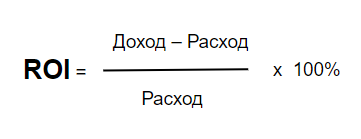

In [84]:
o = user_data['Revenue'].sum()
i = user_data['costs'].sum()
Roi = (o-i)/i*0.9
Roi

-0.5481468912082985

## Окупаемость рекламы с разбивкой по устройствам

Вычесляем все по этой функции 

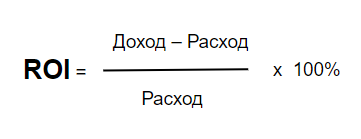

In [86]:
iPhone_r = user_data.loc[user_data['Device'].isin(['iPhone']), 'costs'].sum()
iPhone_r

8587.28

In [87]:
Mac_r = user_data.loc[user_data['Device'].isin(['Mac']), 'costs'].sum()
Mac_r

4536.53

In [88]:
Android_r = user_data.loc[user_data['Device'].isin(['Android']), 'costs'].sum()
Android_r

3875.45

In [89]:
PC_r = user_data.loc[user_data['Device'].isin(['PC']), 'costs'].sum()
PC_r

1741.1399999999999

In [94]:
iPhone_d = user_data.loc[user_data['Device'].isin(['iPhone']), 'Revenue'].sum()
iPhone_d

3244.590000000001

In [95]:
Mac_d = user_data.loc[user_data['Device'].isin(['Mac']), 'Revenue'].sum()
Mac_d

1845.3200000000006

In [96]:
Android_d = user_data.loc[user_data['Device'].isin(['Android']), 'Revenue'].sum()
Android_d

1499.0600000000004

In [97]:
PC_d = user_data.loc[user_data['Device'].isin(['PC']), 'Revenue'].sum()
PC_d

737.5500000000002

In [98]:
Roi_iPhone = (iPhone_d-iPhone_r)/iPhone_r*0.9
Roi_iPhone

-0.5599469214931853

In [99]:
Roi_Mac = (Mac_d-Mac_r)/Mac_r*0.9
Roi_Mac

-0.5339078546818823

In [100]:
Roi_Android = (Android_d-Android_r)/Android_r*0.9
Roi_Android

-0.5518716536144189

In [101]:
Roi_PC = (PC_d-PC_r)/PC_r*0.9
Roi_PC

-0.5187583996691821

## Окупаемость рекламы с разбивкой по странам;

Вычесляем все по этой функции

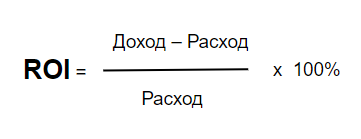

In [102]:
Russia_r = user_data.loc[user_data['Region'].isin(['Russia']), 'costs'].sum()
Russia_r

18740.4

In [103]:
Russia_d = user_data.loc[user_data['Region'].isin(['Russia']), 'Revenue'].sum()
Russia_d

7326.520000000002

In [104]:
Roi_Russia = (Russia_d-Russia_r)/Russia_r*0.9
Roi_Russia

-0.5481468912082985

## Окупаемость рекламы с разбивкой по рекламным каналам.

Вычесляем все по этой функции

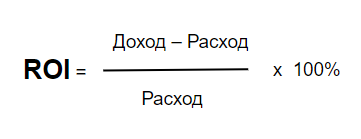

In [66]:
organic_r = user_data.loc[user_data['Channel'].isin(['organic']), 'costs'].sum()
organic_r

10167.439999999999

In [67]:
organic_d = user_data.loc[user_data['Channel'].isin(['organic']), 'Revenue'].sum()
organic_d

4013.090000000001

In [68]:
TipTop_r = user_data.loc[user_data['Channel'].isin(['TipTop']), 'costs'].sum()
TipTop_r

2472.22

In [69]:
TipTop_d = user_data.loc[user_data['Channel'].isin(['TipTop']), 'Revenue'].sum()
TipTop_d

942.1400000000002

In [70]:
FaceBoom_r = user_data.loc[user_data['Channel'].isin(['FaceBoom']), 'costs'].sum()
FaceBoom_r

2869.79

In [71]:
FaceBoom_d = user_data.loc[user_data['Channel'].isin(['FaceBoom']), 'Revenue'].sum()
FaceBoom_d

1119.7800000000002

In [72]:
RocketSuperAds_r = user_data.loc[user_data['Channel'].isin(['RocketSuperAds']), 'costs'].sum()
RocketSuperAds_r

1234.6249999999998

In [73]:
RocketSuperAds_d = user_data.loc[user_data['Channel'].isin(['RocketSuperAds']), 'Revenue'].sum()
RocketSuperAds_d

465.07000000000016

In [74]:
YRabbit_r = user_data.loc[user_data['Channel'].isin(['YRabbit']), 'costs'].sum()
YRabbit_r

1185.1549999999997

In [75]:
YRabbit_d = user_data.loc[user_data['Channel'].isin(['YRabbit']), 'Revenue'].sum()
YRabbit_d

451.10000000000014

In [76]:
MediaTornado_r = user_data.loc[user_data['Channel'].isin(['MediaTornado']), 'costs'].sum()
MediaTornado_r

811.17

In [77]:
MediaTornado_d = user_data.loc[user_data['Channel'].isin(['MediaTornado']), 'Revenue'].sum()
MediaTornado_d

335.3400000000001

In [78]:
Roi_organic = (organic_d-organic_r)/organic_r*0.9
Roi_organic

-0.5447698732424286

In [79]:
Roi_TipTop = (TipTop_d-TipTop_r)/TipTop_r*0.9
Roi_TipTop

-0.5570183883311354

In [80]:
Roi_FaceBoom = (FaceBoom_d-FaceBoom_r)/FaceBoom_r*0.9
Roi_FaceBoom

-0.5488237815310527

In [81]:
Roi_RocketSuperAds = (RocketSuperAds_d-RocketSuperAds_r)/RocketSuperAds_r*0.9
Roi_RocketSuperAds

-0.5609796496912016

In [82]:
Roi_YRabbit = (YRabbit_d-YRabbit_r)/YRabbit_r*0.9
Roi_YRabbit

-0.5574372128540147

In [83]:
Roi_MediaTornado = (MediaTornado_d-MediaTornado_r)/MediaTornado_r*0.9
Roi_MediaTornado

-0.5279374237212914

## Результаты

Реклама в любом случаи неокупалась на -0.50%

# 2.5 Подготовка отчета

В результате этой сессии были выполнены почти все задача

2.1 Построение дашборда
- Была построена Интерактивная информационная панель которая наглядно
представлять, визуализировать и анализировать данные. 
Аналитическая система
позволяет пользователю:


 автоматизировать работу с данными;


 анализировать все в реальном времени;


 видеть все главные метрики на одном экране;
 
легко считывать информацию и делать выводы

2.2 Исследовательский анализ данных в информационной панели
- Разработанная информационная панель позволяет пользователю
проводить анализ продуктовых метрик и показателей электронной коммерции.
были вычислены такие характеристики, как заинтересованность клиента
в продукте (DAU, WAU и MAU), количество времени, проведенное в
приложении, распределение привлеченных пользователей с разбивкой по
различным показателям(страна,устройство,канал,привлечения).
Аналитическая панель содержит анализ продаж для онлайн-торговли.

2.3 Создание профилей пользователей
- Используя ранее определенную функцию построен набор данных с профилями
пользователей. Было определено:


 Из каких стран приходят посетители? Какие страны дают больше всего
платящих пользователей? Russia


 Какими устройствами они пользуются? С каких устройств чаще всего
заходят платящие пользователи? iPhone

По каким рекламным каналам шло привлечение пользователей? Какие каналы
приносят больше всего платящих пользователей? organic

2.4 Маркетинговый анализ
- После проведения маркетингового анализа было расчитано:

Сколько денег потратили (всего / на каждый источник / по времени)?

Сколько в среднем стоило привлечение одного покупателя из каждого
источника?

Оценена окупаемость рекламы для привлечения пользователей. С помощью
ранее разработанных функций проанализированно:

Общую окупаемость рекламы;

Окупаемость рекламы с разбивкой по устройствам;

Окупаемость рекламы с разбивкой по странам;

Окупаемость рекламы с разбивкой по рекламным каналам.

2.5 Подготовка отчета
- Был подготовлен отчет о проделанной работе по итогам сессии, в котором
представлены результаты, выводы и обоснования выбора по каждому разделу
задания. Результаты работы состоят из отчетов в форматах: .ipynb и
.html, а также исходников с возможностью перекомпиляции. Архив Data.zip
содержит все результаты выполнения модуля, а также все необходимые
файлы для запуска и проверки участков кода. В файле Readme.txt
описано содержимое результирующих файлов архива Data.zip.